In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("1-studyhours.csv")

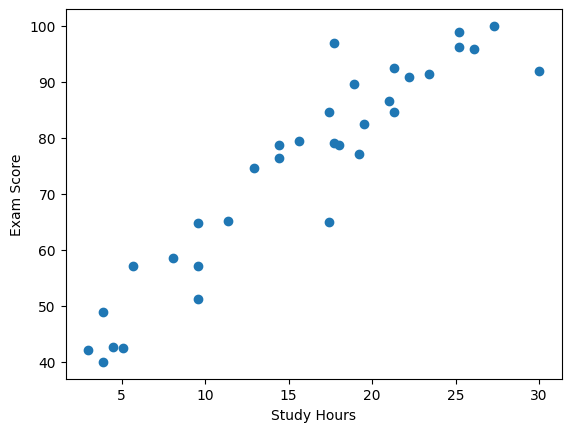

In [3]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [4]:
X = df[["Study Hours"]]
y = df["Exam Score"]

In [5]:
!pip install scikit-learn

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

In [8]:
y_train

9      84.6
14     86.6
29     82.4
20     49.0
27     79.5
24     51.2
12     92.0
18     64.9
0      40.0
25     42.4
28     79.1
21     58.5
6      77.1
22     76.5
32     89.6
7      90.8
19     84.7
2      42.7
4      78.7
15     97.0
30     91.5
31     96.2
11     95.9
13    100.0
26     64.8
10     92.4
Name: Exam Score, dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

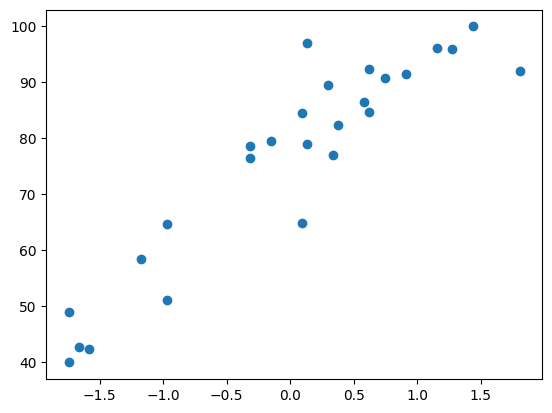

In [12]:
plt.scatter(X_train, y_train)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regression = LinearRegression()

In [15]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
print("Coefficient : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient :  [16.96165751]
Intercept :  76.46538461538462


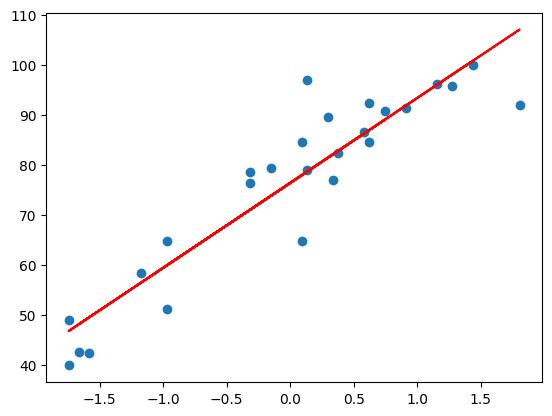

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), "r")
plt.show()

In [18]:
y_pred_test = regression.predict(X_test)

In [19]:
y_test

1     57.1
17    74.7
3     65.1
23    42.2
16    57.2
5     78.8
8     99.0
Name: Exam Score, dtype: float64

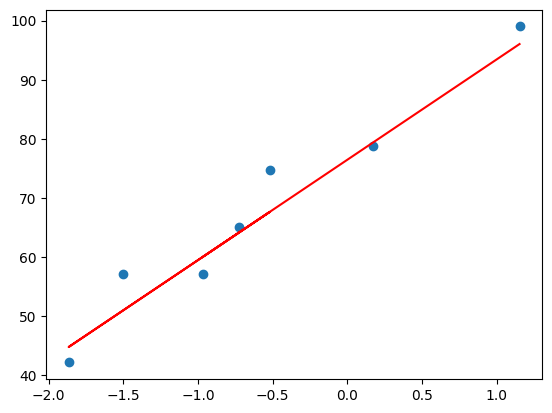

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),"r")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)

mse:  16.150357075009804
mae:  3.321873565026279
rmse:  4.018750685848751


In [26]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test) 
adjusted_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) #adjusted R-squared

In [28]:
print("adjusted r2 score:",adjusted_score)
print("r2 score:",score)


adjusted r2 score: 0.9332207504598556
r2 score: 0.944350625383213


In [32]:
#The estimated grade a student will receive for studying x hours for the exam.
x = 10
print(regression.predict(scaler.transform([[x]]))[0]) 

60.96363681147212


C:\Users\Business\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
